In [1]:
from recommender.nlp import LanguageProcessing
from recommender.database import Database
import gensim
import math
import numpy as np

In [2]:
d = Database()
L = LanguageProcessing(d)
words_text_mat = gensim.matutils.corpus2dense(L.corpus, 7396) # 159 docs, 7396 words

682 number of words used from texts.


In [3]:
# calculating the singular value decomposition (svd)
s = np.linalg.svd(words_text_mat, full_matrices=False, compute_uv=False)
#sorting them
s = -1*np.sort(-s)
# The squared sum of some of the singular values (eigenvalues) divided by the total sum is the variance 
# explained by those components 
s2 = s**2
cum_s = np.cumsum(s)/sum(s)
cum_s2 = np.cumsum(s2)/sum(s2)
print(cum_s2) # all components explain all 159 original dimensions
len(s)

[0.21407121 0.39905035 0.44620347 0.4730432  0.49808556 0.5204685
 0.53914154 0.5559483  0.5703737  0.58444834 0.59813136 0.61094093
 0.6232396  0.63426757 0.64467543 0.6544296  0.663642   0.67249835
 0.68119675 0.68926704 0.69702214 0.70429516 0.7113276  0.7181836
 0.72489697 0.7313829  0.73741764 0.74330276 0.7489822  0.7545488
 0.76003057 0.76536006 0.7706382  0.7756737  0.7805413  0.7853214
 0.78986317 0.79430044 0.79868096 0.8030057  0.8072026  0.81133157
 0.81538004 0.8193087  0.82311755 0.8268796  0.83058155 0.8342341
 0.8378566  0.8414017  0.8448474  0.84823096 0.8515788  0.85489255
 0.85815215 0.8613318  0.864474   0.86757505 0.8705888  0.8735923
 0.87655354 0.8794776  0.8823114  0.88510543 0.88788825 0.8905742
 0.89324    0.8958847  0.8984266  0.9009284  0.9033856  0.9058085
 0.9082007  0.9105007  0.91274285 0.9149675  0.9171201  0.9192379
 0.9213054  0.9233361  0.9253127  0.92718786 0.92898536 0.9307768
 0.93244594 0.9340971  0.93572605 0.93732905 0.93887264 0.94038594
 0.94

159

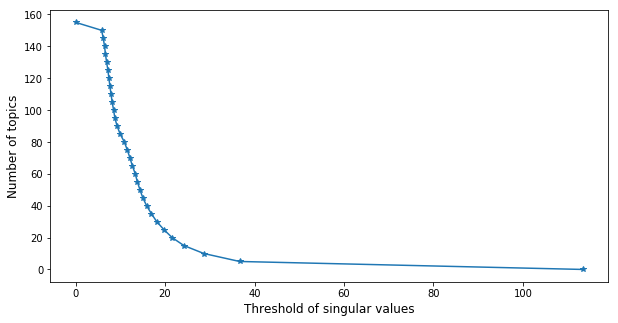

In [4]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(s[range(0,159,5)], range(0,159,5), '*-')
plt.xlabel('Threshold of singular values', fontsize=12)
plt.ylabel('Number of topics', fontsize=12)
plt.show()

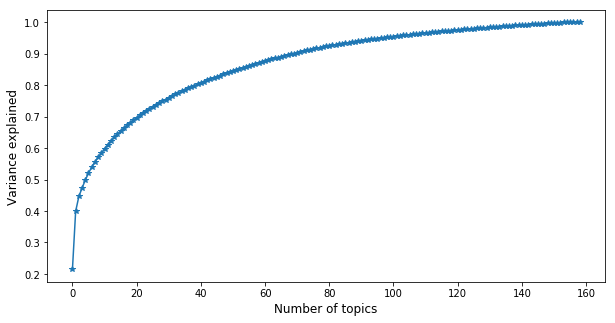

In [5]:
# We want that the dimension reduction still explains a lot of the original data
plt.figure(figsize=(10,5))
plt.plot(range(0,159), cum_s2, '*-')
plt.xlabel('Number of topics', fontsize=12)
plt.ylabel('Variance explained', fontsize=12)
plt.show()

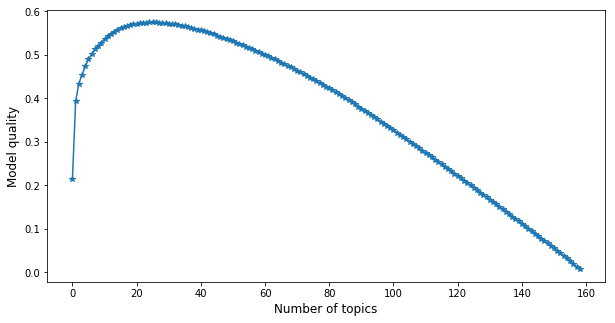

In [6]:
# We model this tradeoff with an idea of minimum description length
# length of description =  (number of topics) / (number of texts)
# quality of description = variance explained = cumulative sum of squared singular values normed
# Idea best model is the one that explains the most with the smallest description length
# argmax quality of decscription - length of description
model_quality = -1*np.array(range(0,159))/159 + cum_s2
plt.figure(figsize=(10,5))
plt.plot(range(0,159), -1*np.array(range(0,159))/159 + cum_s2, '*-')
plt.xlabel('Number of topics', fontsize=12)
plt.ylabel('Model quality', fontsize=12)
plt.show()

In [70]:
#print(max(model_quality))
# Number of topics that this methodology recommends
print(np.argmax(model_quality))

[0.21407121 0.39276105 0.43362485 0.45417528 0.47292833 0.48902193
 0.50140569 0.51192316 0.52005925 0.52784456 0.53523828 0.54175854
 0.54776788 0.55250656 0.55662512 0.56008999 0.56301306 0.56558011
 0.5679892  0.56977018 0.57123598 0.57221969 0.57296283 0.57352949
 0.57395357 0.5741502  0.57389563 0.57349144 0.57288156 0.57215885
 0.57135132 0.5703915  0.56938037 0.56812652 0.56670482 0.56519563
 0.56344807 0.56159603 0.55968725 0.55772268 0.55563025 0.55346993
 0.55122909 0.54886845 0.54638799 0.54386075 0.54127337 0.53863663
 0.5359698  0.5332256  0.53038197 0.52747624 0.52453475 0.52155922
 0.51852951 0.51541987 0.51227274 0.50908448 0.50580891 0.50252313
 0.49919504 0.49582982 0.4923743  0.48887902 0.48537253 0.48176919
 0.47814564 0.47450104 0.47075364 0.46696611 0.46313401 0.45926763
 0.45537049 0.45138121 0.44733405 0.44326936 0.43913268 0.43496118
 0.43073938 0.42648074 0.42216804 0.4177539  0.41326209 0.4087642
 0.40414406 0.39950592 0.39484554 0.39015924 0.38541352 0.38063

In [63]:
# idea of dimension reduction should still explain 70 percent of the variance (rule of thumb)
s07 = [i for i in cum_s2 if i <= 0.7]
print(s07)
print(len(s07))

[0.21407121, 0.39905035, 0.44620347, 0.4730432, 0.49808556, 0.5204685, 0.53914154, 0.5559483, 0.5703737, 0.58444834, 0.59813136, 0.61094093, 0.6232396, 0.63426757, 0.64467543, 0.6544296, 0.663642, 0.67249835, 0.68119675, 0.68926704, 0.69702214]
21


In [11]:
import numpy as np
texts = ["This is a text.", "Is that a second text"]
words = set()
for t in texts:
  words = words.union(t.lower().split(" "))
print(words)
words = list(words)
print(np.array([[int(w in s) for s in texts] for w in words]))

{'a', 'this', 'is', 'second', 'text.', 'text', 'that'}
[[1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]]


In [14]:
# Analyze the topics. Can you interpret them somehow?
#topic_word_vecs = L.lsi.get_topics()
#print([i for i in [np.argmax(t) for t in topic_word_vecs]][:5])
#print(L.index)

AttributeError: 'LanguageProcessing' object has no attribute 'lsi'

In [31]:
from recommender.nlp import LanguageProcessing
from nltk.corpus import stopwords

class Empty(object):
    pass


L = Empty()
L.__class__ = LanguageProcessing
L.documents = ["this word words a BLOCKCHAIN"]
L.stop_words = set(stopwords.words("English"))
L.prepare_data()
set(list(L.dictionary.values())) == {"word", "blockchain"}
#type(L.dictionary)
#help(L.dictionary)

Dictionary(2 unique tokens: ['blockchain', 'word'])


True

In [45]:
s = np.array([1.7320508, 1.4142135, 1.       ])
var = (s**2)/sum(s**2)
cum_var = np.cumsum(var)
print(cum_var)
print(-1 * np.array(range(1,len(s) + 1)) / len(s) + cum_var)

[0.50000001 0.83333333 1.        ]
[0.16666668 0.16666666 0.        ]
